# Housing price prediction using Machine Learning

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_squared_error

In [66]:
data=pd.read_csv("E:\PVT\Academic\ML Workshop\Dataset\Housing Price.CSV")

In [67]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# Data Cleaning

In [68]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [69]:
data.duplicated().sum()

0

# Exploratory Analysis

In [70]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


[]

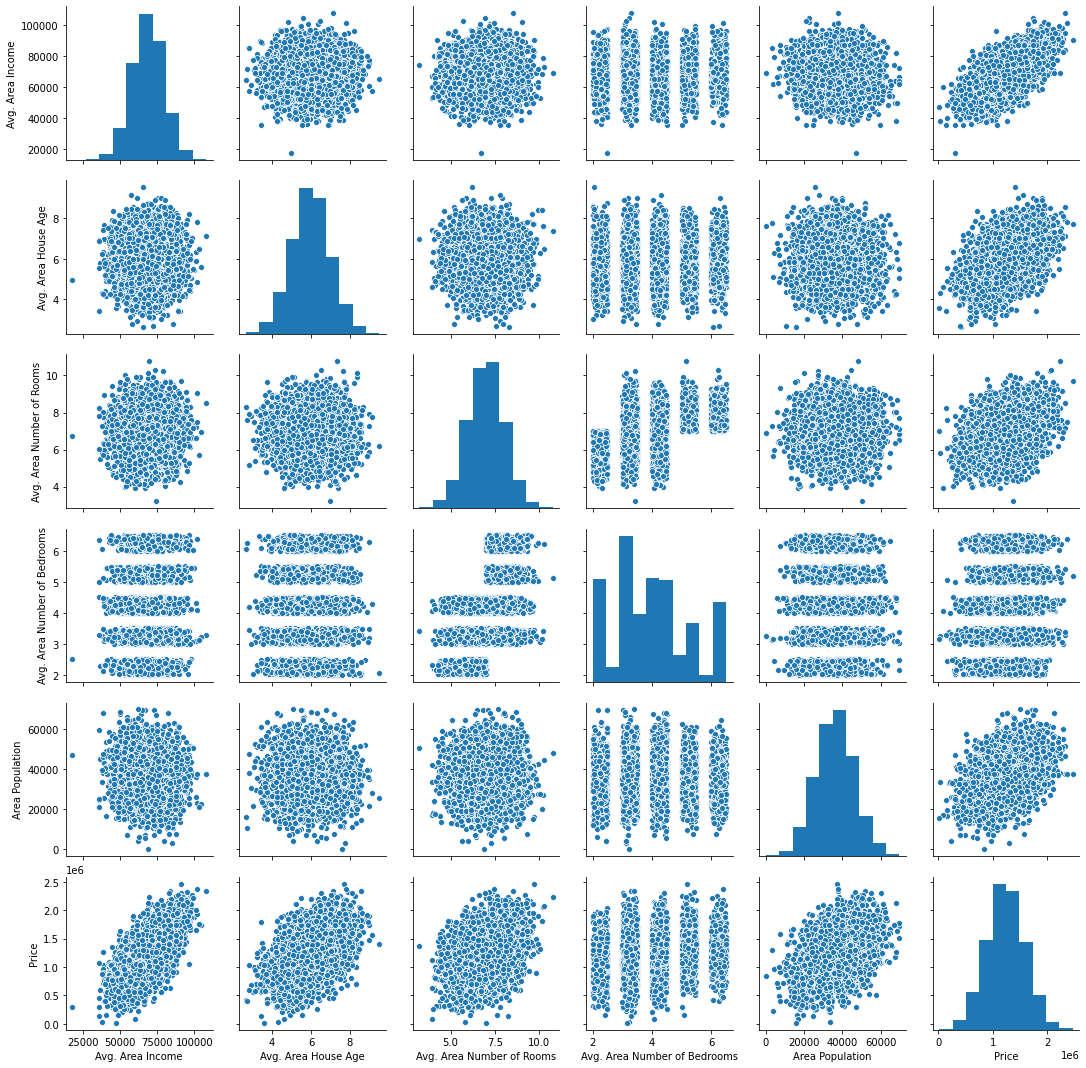

In [71]:
sns.pairplot(data)
plt.plot()

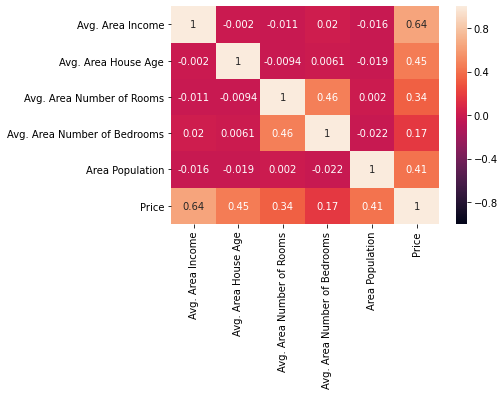

In [72]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

# Machine Learning

In [73]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [74]:
x=data.iloc[:,:5].values
y=data.iloc[:,5].values

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [76]:
lm=LinearRegression()

In [77]:
lm.fit(x_train,y_train)

LinearRegression()

In [78]:
lm.coef_

array([2.16604083e+01, 1.65809651e+05, 1.20329408e+05, 2.19309558e+03,
       1.52858855e+01])

In [79]:
data.columns[0:5]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [80]:
pd.DataFrame(lm.coef_,index=data.columns[0:5],columns=["Coefficient"])

,Coefficient
Avg. Area Income,21.660408
Avg. Area House Age,165809.651152
Avg. Area Number of Rooms,120329.407878
Avg. Area Number of Bedrooms,2193.095578
Area Population,15.285885


In [81]:
lm.intercept_

-2646630.531088098

In [82]:
lm.score(x_train,y_train)

0.9188401140943028

In [83]:
y_pred=lm.predict(x_test)

In [84]:
x_with_constant=sm.add_constant(x_train)

In [85]:
lm_sm=sm.OLS(y_train,x_with_constant)

In [86]:
result=lm_sm.fit()

In [87]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     9044.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:00:59   Log-Likelihood:                -51755.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.647e+06   1.91e+04   -138.228      0.0

In [88]:
print(variance_inflation_factor(x_train,0))
print(variance_inflation_factor(x_train,1))
print(variance_inflation_factor(x_train,2))
print(variance_inflation_factor(x_train,3))
print(variance_inflation_factor(x_train,4))

29.518898716616043
27.14474538095936
44.5088122262337
14.51216193025586
12.896484451106032


In [89]:
resid=y_train-lm.predict(x_train)

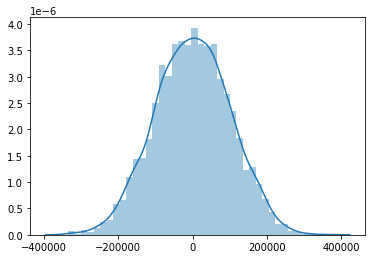

In [90]:
sns.distplot(resid)
plt.show()

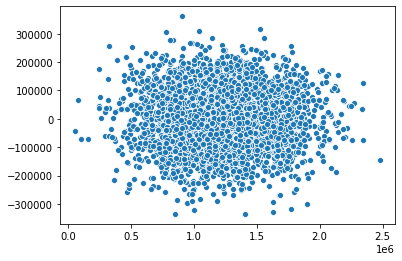

In [91]:
sns.scatterplot(lm.predict(x_train),resid)
plt.show()

# KNN Regression

In [92]:
Errors=[]
K=np.arange(1,21)

for k in K:
    model=KNeighborsRegressor(n_neighbors=k)
    cvals=np.sqrt(-cross_val_score(model,x_train,y_train,cv=10,scoring="neg_mean_squared_error"))
    Errors.append(cvals.mean())

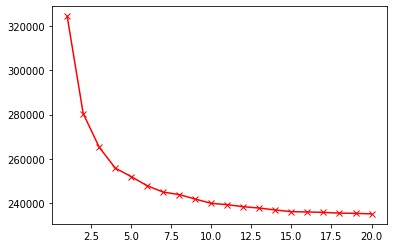

In [93]:
plt.plot(K,Errors,"rx-")
plt.show()

In [94]:
knn = KNeighborsRegressor(n_neighbors=4)

In [95]:
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [96]:
y_pred=lm.predict(x_test)

# Random Forest Regression

In [97]:
params={"n_estimators":[100,200,300,400,500]}
model=RandomForestRegressor()
cval=KFold(n_splits=5)

In [98]:
gsearch=GridSearchCV(model,params,cv=cval)

In [99]:
results=gsearch.fit(x_train,y_train)
results.best_params_

{'n_estimators': 400}

In [100]:
rf = RandomForestRegressor(n_estimators=500)

In [101]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [102]:
y_pred=rf.predict(x_test)

[]

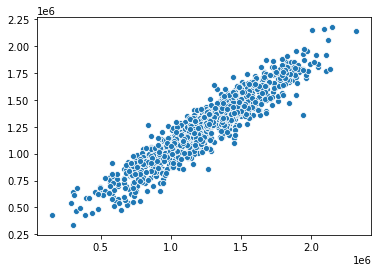

In [103]:
sns.scatterplot(y_test,y_pred)
plt.plot()

In [104]:
idx=np.argsort(rf.feature_importances_)

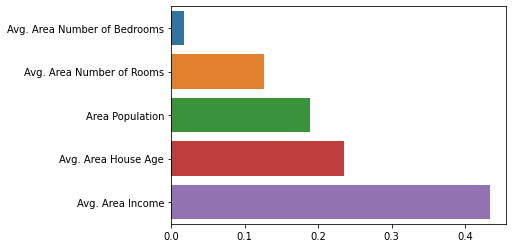

In [105]:
sns.barplot(x=rf.feature_importances_[idx],y=data.columns[:5][idx])
plt.show()

# Stacking Regression

In [106]:
bmodel1=LinearRegression()
bmodel2=KNeighborsRegressor(n_neighbors=6)

In [107]:
metamodel=RandomForestRegressor(n_estimators=500)

In [108]:
st=StackingRegressor(regressors=[bmodel1,bmodel2],meta_regressor=metamodel)

In [109]:
st.fit(x_train, y_train)

StackingRegressor(meta_regressor=RandomForestRegressor(n_estimators=500),
                  regressors=[LinearRegression(),
                              KNeighborsRegressor(n_neighbors=6)])

In [110]:
y_pred=st.predict(x_test)

[]

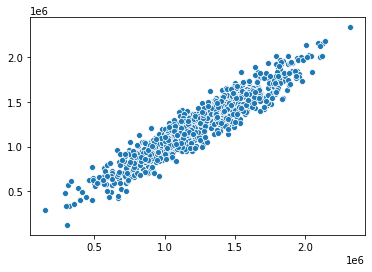

In [111]:
sns.scatterplot(y_test,y_pred)
plt.plot()

# Comparing performance

In [112]:
y_pred=lm.predict(x_test)
lm_rmse=np.sqrt(mean_squared_error(y_pred,y_test))

In [113]:
y_pred=knn.predict(x_test)
knn_rmse=np.sqrt(mean_squared_error(y_pred,y_test))

In [114]:
y_pred=rf.predict(x_test)
rf_rmse=np.sqrt(mean_squared_error(y_pred,y_test))

In [115]:
y_pred=st.predict(x_test)
st_rmse=np.sqrt(mean_squared_error(y_pred,y_test))

In [116]:
pd.DataFrame({"Model":["Linear Regression","KNN","Random Forest","Stacking"],"RMSE":[lm_rmse,knn_rmse,rf_rmse,st_rmse]})

,Model,RMSE
0,Linear Regression,102711.838100
1,KNN,252656.404392
2,Random Forest,121953.723368
3,Stacking,113775.459406


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import StackingRegressor as stc


In [118]:
data=pd.read_csv("E:\PVT\Academic\ML Workshop\Dataset\Housing Price.CSV")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [119]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [120]:
data.duplicated().sum()

0

In [121]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [122]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

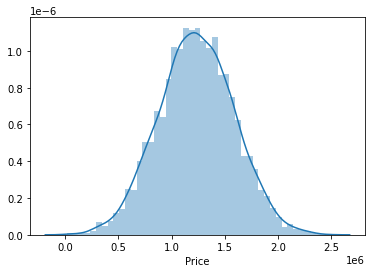

In [123]:
sns.distplot(data["Price"])
plt.show()

In [124]:
# response has noraml distribution. hence linear regressoion is good

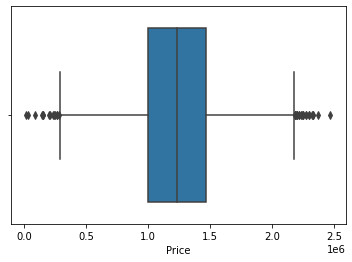

In [125]:
sns.boxplot(data["Price"])
plt.show()

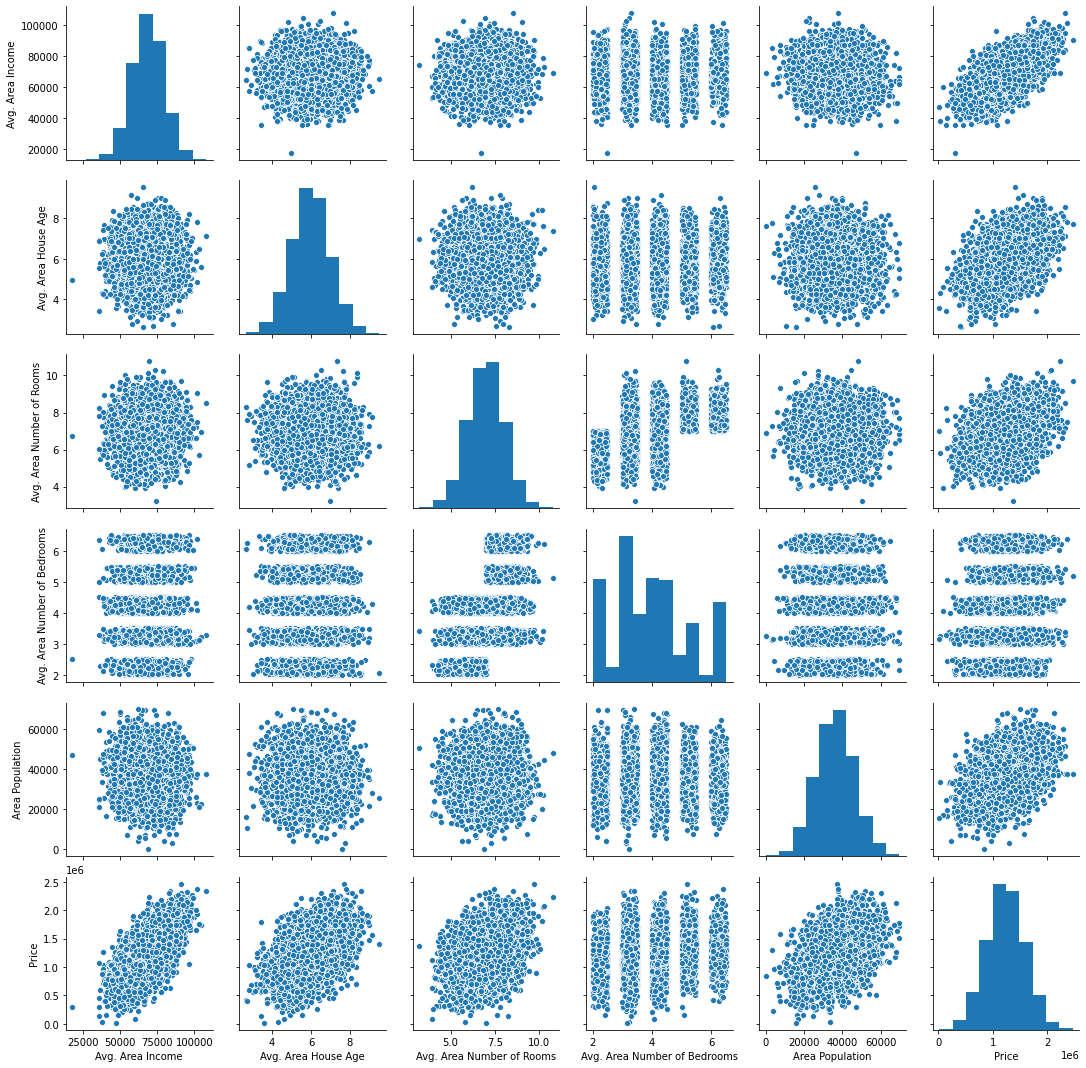

In [126]:
sns.pairplot(data)
plt.show()

In [127]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


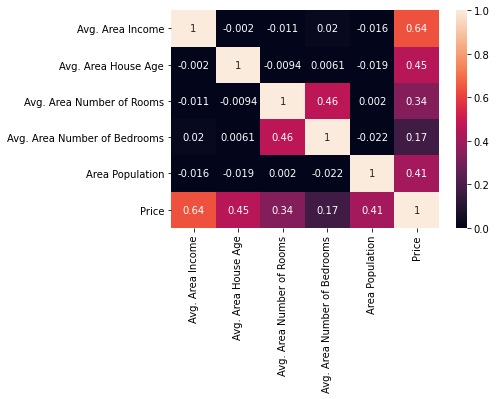

In [128]:
sns.heatmap(data.corr(),annot=True, vmin=0,vmax=1)
plt.show()

In [129]:
data.shape

(5000, 6)

In [130]:
x = data.iloc[:,:5].values
y = data.iloc[:,5].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [131]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [132]:
lm.intercept_

-2646630.531088098

In [133]:
y_pred = lm.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

102711.83810006664

In [134]:
import statsmodels.api as sm

In [135]:
x_with_contstant = sm.add_constant(x_train)

In [136]:
lm_sm=sm.OLS(y_train,x_with_contstant)
resutl = lm_sm.fit()
print(resutl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     9044.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:02:41   Log-Likelihood:                -51755.
No. Observations:                4000   AIC:                         1.035e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.647e+06   1.91e+04   -138.228      0.0

In [137]:
# you can remove X4 since rooms and bedrooms are colreated

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
print(variance_inflation_factor(x_train,0))
print(variance_inflation_factor(x_train,1))
print(variance_inflation_factor(x_train,2))
print(variance_inflation_factor(x_train,3))
print(variance_inflation_factor(x_train,4))

29.518898716616043
27.14474538095936
44.5088122262337
14.51216193025586
12.896484451106032


<AxesSubplot:>

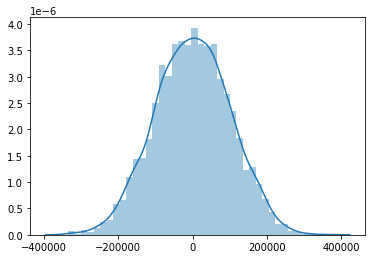

In [140]:
resid = y_train-lm.predict(x_train)
sns.distplot(resid) #linear regression assumption is residuals are normally distributed

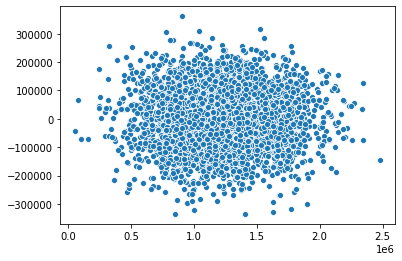

In [141]:
sns.scatterplot(lm.predict(x_train),resid)
plt.show()

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
Errors = []
K = np.arange(1,21)
for k in K:
    model = KNeighborsRegressor(n_neighbors=k)
    cvals = -cross_val_score(model,x_train,y_train,cv=10, scoring="neg_mean_squared_error")
    Errors.append(np.mean(np.sqrt(cvals)))
Errors
    

[324322.364764617,
 280479.4271347085,
 265279.1831585461,
 255890.41017580003,
 252031.1381359925,
 247890.8844248652,
 245046.45848397445,
 243934.70757193366,
 241900.6487938847,
 239988.97734038328,
 239384.5875375587,
 238480.7164182631,
 237851.18729699723,
 236997.2517465952,
 236235.32364344737,
 236089.10299172002,
 235916.57462166407,
 235580.39031723182,
 235482.52538611274,
 235220.75677633676]

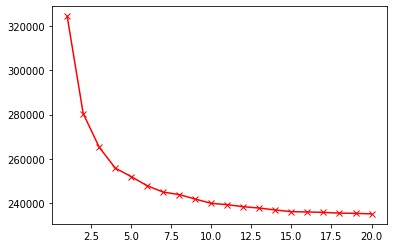

In [144]:
plt.plot(K,Errors,"rx-")
plt.show()

In [145]:
# Elbow value is 4

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

252656.40439239674

In [146]:
from sklearn.model_selection import GridSearchCV,KFold

In [147]:
params={"n_estimators":[100,200,300,400,500]}
model = RandomForestRegressor()
cval = KFold(n_splits=5)
gsearch = GridSearchCV(model,params,cv=cval)
results= gsearch.fit(x_train,y_train)
results.best_params_

{'n_estimators': 500}

In [148]:
rf =  RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

121785.1713334985

In [149]:
rf.feature_importances_

array([0.43405088, 0.23417941, 0.12637642, 0.01700549, 0.1883878 ])

In [150]:
data.columns[:5]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [151]:
arr = np.array([20,30,10])
np.argsort(arr)
arr[np.argsort(arr)]

array([10, 20, 30])

In [152]:
idx = np.argsort(rf.feature_importances_)
data.columns[:5][idx]

Index(['Avg. Area Number of Bedrooms', 'Avg. Area Number of Rooms',
       'Area Population', 'Avg. Area House Age', 'Avg. Area Income'],
      dtype='object')

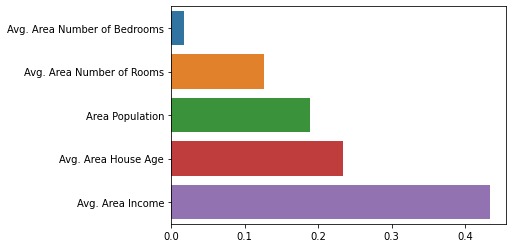

In [153]:
sns.barplot(y=data.columns[:5][idx],x=rf.feature_importances_[idx])
plt.show()

In [154]:
from sklearn.ensemble import StackingClassifier,StackingRegressor

In [155]:
model1= LinearRegression()
model2 = KNeighborsRegressor(n_neighbors=4)
metamodel = RandomForestRegressor(n_estimators=500)


T1 = ("LR",model1)
T2 = ("KNN",model2)

stcl = StackingRegressor(estimators=[T1,T2],final_estimator=metamodel)
stcl.fit(x_train,y_train)
y_pred = stcl.predict(x_test)
np.sqrt(mean_squared_error(y_pred,y_test))

114963.09771012461